# Midterm: Mapping Climate Disaster Risk and Social Vulnerability in LA County

#### **Research Question** ####
*What communities in LA county are most at risk of wildfire and post-wildfire flooding and who is most vulnerable?*

#### **Intro** ####
Given the growing impact of climate-related disasters in California, such as wildfires and post-wildfire flooding, our team hopes to create an interactive mapping tool that Los Angeles planners and policy-makers can use to visualize hazard areas and identify vulnerable populations that will need additional support before, during, and after disaster strikes. 

#### **Social Vulnerability** ####
For my portion of the project, I will be exploring and analyzing the spatial aspects of social vulnerability in LA County. Many social vulnerability indicators are closely linked and when someone is vulnerable in one way, they are usually vulnerable in other ways as well. In order to get the most comprehensive understanding of which communities are disproportionately vulnerable to disaster risk, I decided to bring in two datasets:

#### **Data** ####
***Los Angeles County CVA Social Vulnerability Index (geojson):*** The Los Angeles County Climate Vulnerability Assessment identified and incorporated 29 social vulnerability indicators to create a social vulnerability index.

## 1) Import Libraries + Data ##

In [1]:
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt

import contextily as ctx

import plotly.express as px

In [2]:
import folium
import json

In [3]:
# read in a geojson file downloaded from the LA County Geohub and OEHHA website
svi =gpd.read_file('data/Los_Angeles_County_CVA_Social_Vulnerability_Index.geojson')

#Let's take a look at a sample of the data
svi.sample(5)

Census_Tract              County CSA_Type  \
942   Census Tract 9105.02  Los Angeles County     City   
131   Census Tract 1154.03  Los Angeles County     City   
450      Census Tract 2079  Los Angeles County     City   
479      Census Tract 2184  Los Angeles County     City   
1985  Census Tract 9006.08  Los Angeles County     City   

                             CSA_Label                  DRP_Planning_Area  \
942                   City of Palmdale      Antelope Valley Planning Area   
131           Los Angeles - Northridge  San Fernando Valley Planning Area   
450             Los Angeles - Downtown                Metro Planning Area   
479   Los Angeles - Cloverdale/Cochran             Westside Planning Area   
1985                 City of Lancaster      Antelope Valley Planning Area   

     DPH_Service_Planning_Area               City_of_Los_Angeles_CPA  \
942            Antelope Valley                                  None   
131               San Fernando                            Northridge   
450                      Metro                          Central City   
479                      South  West Adams - Baldwin Hills - Leimert   
1985           Antelope Valley                                  None   

      Population  Children  Older_Adults  ...  Asian  NHOPI  Other_Race  \
942         4439      41.0           8.4  ...    4.1    0.0         0.2   
131         3722      28.2           9.3  ...   14.0    0.0         0.0   
450         6133      12.1           5.5  ...   37.7    0.0         0.0   
479         4978      30.0           6.5  ...    1.7    0.0         0.9   
1985        3509      28.8          13.1  ...    3.6    0.0         0.3   

      Two_or_More_Races  SoVI_Score  SoVI_Thirds  ObjectId   Shape__Area  \
942                 0.7        3.74            3       943  2.963036e+06   
131                 1.4        1.60            3       132  1.029068e+06   
450                 4.7       -3.83            1       451  1.331025e+06   
479                 1.4        1.25            3       480  9.466929e+05   
1985                1.5        0.80            2      1986  1.980971e+06   

      Shape__Length                                           geometry  
942     6961.940592  POLYGON ((-118.10766 34.58734, -118.09427 34.5...  
131     4097.415419  POLYGON ((-118.53608 34.22889, -118.53397 34.2...  
450     4694.158842  POLYGON ((-118.26801 34.04065, -118.26282 34.0...  
479     4478.911322  POLYGON ((-118.36574 34.03632, -118.36167 34.0...  
1985    5965.531486  POLYGON ((-118.11265 34.70412, -118.10404 34.7...  

[5 rows x 47 columns]

## 2) Data Exploration ##

In [4]:
svi.shape

(2327, 47)

<AxesSubplot: >

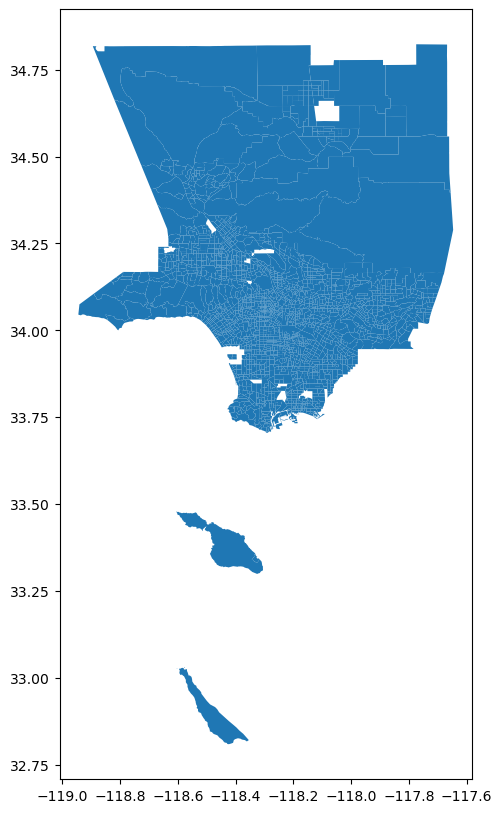

In [5]:
# Let's quickly plot it and see what it looks like
svi.plot(figsize=(12,10))

In [6]:
# Tell me more about the data columns
svi.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Census_Tract                     2327 non-null   object  
 1   County                           2327 non-null   object  
 2   CSA_Type                         2327 non-null   object  
 3   CSA_Label                        2327 non-null   object  
 4   DRP_Planning_Area                2327 non-null   object  
 5   DPH_Service_Planning_Area        2327 non-null   object  
 6   City_of_Los_Angeles_CPA          994 non-null    object  
 7   Population                       2327 non-null   int64   
 8   Children                         2327 non-null   float64 
 9   Older_Adults                     2327 non-null   float64 
 10  Older_Adults_Living_Alone        2327 non-null   float64 
 11  Limited_English                  2327 non-null   float64 
 12

Great that all of the columns are filled! And also important to note that most of the data are floats that represent a percentage of the census tract population. Others include rates (ie Asthma, Cardiovascular_Disease), median values (ie Median_Income), and average distance (ie Library_Access).

## 3) Data Analysis/Statistics ##

Let's trim the data to only pull in the columns we're interested in for further data analysis

In [7]:
#Let's create another dataframe with just our desired columns
#creates list of desired columns
svi_desired_columns = ['Census_Tract','CSA_Label','Population','Limited_English','No_High_School_Diploma','Disability','Renters','Poverty','Households_Without_Vehicle_Acce','Hispanic_Latinx','White','Black','Native_Tribal','Asian','NHOPI','SoVI_Score','geometry']

# subset based on desired columns
svi[svi_desired_columns].sample(5)

Census_Tract                      CSA_Label  Population  \
2028  Census Tract 1991.20  Los Angeles - Lincoln Heights        4377   
376   Census Tract 3107.02                City of Burbank        6852   
396   Census Tract 3020.03               City of Glendale        3557   
715   Census Tract 2111.21  Los Angeles - Wilshire Center        2186   
1978     Census Tract 2733           Los Angeles - Venice        3232   

      Limited_English  No_High_School_Diploma  Disability  Renters  Poverty  \
2028             19.7                    40.4         9.7     78.0     41.3   
376              22.9                    16.5        17.8     89.9     19.3   
396              34.4                    15.9        19.1     93.3     19.0   
715              17.4                    13.0         6.1     95.9     12.8   
1978              0.7                    15.2         6.8     82.7     15.9   

      Households_Without_Vehicle_Acce  Hispanic_Latinx  White  Black  \
2028                             17.7             74.1    3.1    0.7   
376                              23.9             17.6   64.1    2.6   
396                              17.0             11.1   69.6    1.0   
715                              10.0             40.6   14.1    6.8   
1978                             15.1             24.9   53.1   15.6   

      Native_Tribal  Asian  NHOPI  SoVI_Score  \
2028            0.0   21.6    0.0        1.38   
376             0.7   13.1    0.0        2.22   
396             0.0   15.5    0.3        2.69   
715             0.0   33.5    1.4        0.52   
1978            0.0    1.6    0.0       -4.30   

                                               geometry  
2028  POLYGON ((-118.20610 34.06605, -118.20506 34.0...  
376   POLYGON ((-118.31459 34.18040, -118.31045 34.1...  
396   POLYGON ((-118.24715 34.14635, -118.24520 34.1...  
715   POLYGON ((-118.28681 34.07633, -118.28628 34.0...  
1978  POLYGON ((-118.47762 33.99857, -118.47658 33.9...

In [8]:
# declare subset as new dataframe and make copy
svi_df = svi[svi_desired_columns].copy()
svi_df.head()

Census_Tract           CSA_Label  Population  Limited_English  \
0  Census Tract 5709.02    City of Lakewood        3765              0.0   
1  Census Tract 5715.02  City of Long Beach        4700              4.4   
2  Census Tract 9106.05    City of Palmdale        4710              6.0   
3  Census Tract 9107.12    City of Palmdale        2924             10.3   
4  Census Tract 9107.15    City of Palmdale        6494              9.0   

   No_High_School_Diploma  Disability  Renters  Poverty  \
0                    13.9         7.4     26.4      1.5   
1                    12.2        14.5     42.7     10.0   
2                    28.7         7.3     39.7     17.1   
3                    33.8        11.7     19.4      7.0   
4                    26.5         8.9     30.3     11.3   

   Households_Without_Vehicle_Acce  Hispanic_Latinx  White  Black  \
0                              3.8             34.9   40.9    4.9   
1                              9.0             34.6   22.5   19.2   
2                              3.3             70.7   12.4    8.8   
3                              0.9             68.3   13.4   15.4   
4                              8.9             71.6   10.8   15.6   

   Native_Tribal  Asian  NHOPI  SoVI_Score  \
0            0.0   10.9    0.0        2.25   
1            0.0   21.7    0.1       -1.77   
2            0.0    5.3    0.0        2.39   
3            0.0    1.3    0.0       -1.05   
4            0.3    1.2    0.0        2.47   

                                            geometry  
0  POLYGON ((-118.12509 33.86032, -118.12287 33.8...  
1  POLYGON ((-118.19274 33.84376, -118.18975 33.8...  
2  POLYGON ((-118.07616 34.57281, -118.06728 34.5...  
3  POLYGON ((-118.05857 34.55809, -118.05847 34.5...  
4  POLYGON ((-118.08506 34.55654, -118.08485 34.5...

I want to examine the SoVI_Score column more to figure out the range of values included in this column. My thought is that I can categorize the SoVI_Score values into 'High', 'Medium', and 'Low' vulnerability to use for further analysis

In [9]:
#Let's sort the values of the SoVI_Score column
svi_df['SoVI_Score'].sort_values()

169    -9.97
944    -9.15
2050   -8.15
1307   -7.96
1873   -7.88
        ... 
1753    7.25
1497    7.27
156     7.74
1886    7.76
1726    7.80
Name: SoVI_Score, Length: 2327, dtype: float64

Okay, the range of scores is about -10 to 8...if I divided up into three tiers of vulnerability, the ranges would be as follows: Low Vulnerability (-10 to -4 SoVI score), Medium Vulnerability (-4 to 2), High vulnerability (2 to 8)

In [10]:
#Let's create a new column for our three vulnerability tiers and assign values based on SoVI_Score
# create a list of our conditions
conditions = [(svi_df['SoVI_Score'] <= -4.0),
    (svi_df['SoVI_Score'] > -4.0) & (svi_df['SoVI_Score'] <= 2.0),
    (svi_df['SoVI_Score'] > 2.0)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
svi_df['svi_tier'] = np.select(conditions, values)

# display updated DataFrame
svi_df.head()

Census_Tract           CSA_Label  Population  Limited_English  \
0  Census Tract 5709.02    City of Lakewood        3765              0.0   
1  Census Tract 5715.02  City of Long Beach        4700              4.4   
2  Census Tract 9106.05    City of Palmdale        4710              6.0   
3  Census Tract 9107.12    City of Palmdale        2924             10.3   
4  Census Tract 9107.15    City of Palmdale        6494              9.0   

   No_High_School_Diploma  Disability  Renters  Poverty  \
0                    13.9         7.4     26.4      1.5   
1                    12.2        14.5     42.7     10.0   
2                    28.7         7.3     39.7     17.1   
3                    33.8        11.7     19.4      7.0   
4                    26.5         8.9     30.3     11.3   

   Households_Without_Vehicle_Acce  Hispanic_Latinx  White  Black  \
0                              3.8             34.9   40.9    4.9   
1                              9.0             34.6   22.5   19.2   
2                              3.3             70.7   12.4    8.8   
3                              0.9             68.3   13.4   15.4   
4                              8.9             71.6   10.8   15.6   

   Native_Tribal  Asian  NHOPI  SoVI_Score  \
0            0.0   10.9    0.0        2.25   
1            0.0   21.7    0.1       -1.77   
2            0.0    5.3    0.0        2.39   
3            0.0    1.3    0.0       -1.05   
4            0.3    1.2    0.0        2.47   

                                            geometry svi_tier  
0  POLYGON ((-118.12509 33.86032, -118.12287 33.8...     High  
1  POLYGON ((-118.19274 33.84376, -118.18975 33.8...   Medium  
2  POLYGON ((-118.07616 34.57281, -118.06728 34.5...     High  
3  POLYGON ((-118.05857 34.55809, -118.05847 34.5...   Medium  
4  POLYGON ((-118.08506 34.55654, -118.08485 34.5...     High

Great, it worked! Now let's sort the data to look at 'Top 10' census tracts for different indicators. I'm interested in seeing how 'High' vulnerability census tracts compare to 'Low' vulnerability census tracts. Let's create new dataframes for just 'High' and 'Low' vulnerability census tracts.

## 'High' Vulnerability Cities/Census Tracts ##

In [11]:
#Let's create another dataframe for 'High' vulnerability
#creates list
svi_df[svi_df['svi_tier']=='High']

Census_Tract                  CSA_Label  Population  \
0     Census Tract 5709.02           City of Lakewood        3765   
2     Census Tract 9106.05           City of Palmdale        4710   
4     Census Tract 9107.15           City of Palmdale        6494   
6     Census Tract 9200.37      City of Santa Clarita        8266   
11    Census Tract 1048.22      Los Angeles - Pacoima        2748   
...                    ...                        ...         ...   
2310     Census Tract 4332           City of El Monte        6270   
2314  Census Tract 1276.04  Los Angeles - Lake Balboa        3093   
2317  Census Tract 1070.20       Los Angeles - Sylmar        5442   
2322  Census Tract 6010.02          City of Inglewood        5099   
2325     Census Tract 5420            City of Compton        4606   

      Limited_English  No_High_School_Diploma  Disability  Renters  Poverty  \
0                 0.0                    13.9         7.4     26.4      1.5   
2                 6.0                    28.7         7.3     39.7     17.1   
4                 9.0                    26.5         8.9     30.3     11.3   
6                13.9                    23.3         7.5     82.8     30.6   
11               23.8                    54.1        14.5     63.6     20.6   
...               ...                     ...         ...      ...      ...   
2310             23.2                    50.9        10.3     56.9     20.1   
2314             36.2                    30.4        14.7     79.8     22.5   
2317             16.2                    37.3        12.4     29.7      6.4   
2322             12.0                    25.1        12.3     76.1     19.6   
2325             11.1                    35.9        12.8     41.3     13.3   

      Households_Without_Vehicle_Acce  Hispanic_Latinx  White  Black  \
0                                 3.8             34.9   40.9    4.9   
2                                 3.3             70.7   12.4    8.8   
4                                 8.9             71.6   10.8   15.6   
6                                 1.2             76.0   10.4    6.9   
11                               10.0             91.2    2.9    1.2   
...                               ...              ...    ...    ...   
2310                             11.9             63.5    3.2    0.6   
2314                             18.5             55.9   26.7    3.4   
2317                              3.0             86.0    3.1    0.6   
2322                             12.4             40.0    1.6   49.2   
2325                              8.7             78.6    1.2   19.1   

      Native_Tribal  Asian  NHOPI  SoVI_Score  \
0               0.0   10.9    0.0        2.25   
2               0.0    5.3    0.0        2.39   
4               0.3    1.2    0.0        2.47   
6               0.0    4.8    0.0        2.88   
11              0.0    4.5    0.0        4.42   
...             ...    ...    ...         ...   
2310            0.0   32.2    0.0        2.20   
2314            0.0   11.4    0.0        6.46   
2317            0.0    9.4    0.0        2.18   
2322            3.2    1.7    0.0        3.23   
2325            0.0    1.2    0.0        3.92   

                                               geometry svi_tier  
0     POLYGON ((-118.12509 33.86032, -118.12287 33.8...     High  
2     POLYGON ((-118.07616 34.57281, -118.06728 34.5...     High  
4     POLYGON ((-118.08506 34.55654, -118.08485 34.5...     High  
6     POLYGON ((-118.45839 34.41097, -118.45766 34.4...     High  
11    POLYGON ((-118.42581 34.25283, -118.42266 34.2...     High  
...                                                 ...      ...  
2310  POLYGON ((-118.04859 34.06814, -118.04742 34.0...     High  
2314  POLYGON ((-118.48584 34.20105, -118.47493 34.2...     High  
2317  POLYGON ((-118.45567 34.30228, -118.45418 34.3...     High  
2322  POLYGON ((-118.35263 33.95271, -118.35208 33.9...     High  
2325  POLYGON ((-118.20731 33.90754, -118.206

In [12]:
# declare list as dataframe and display
svi_high = svi_df[svi_df['svi_tier']=='High']
svi_high.head()

Census_Tract              CSA_Label  Population  Limited_English  \
0   Census Tract 5709.02       City of Lakewood        3765              0.0   
2   Census Tract 9106.05       City of Palmdale        4710              6.0   
4   Census Tract 9107.15       City of Palmdale        6494              9.0   
6   Census Tract 9200.37  City of Santa Clarita        8266             13.9   
11  Census Tract 1048.22  Los Angeles - Pacoima        2748             23.8   

    No_High_School_Diploma  Disability  Renters  Poverty  \
0                     13.9         7.4     26.4      1.5   
2                     28.7         7.3     39.7     17.1   
4                     26.5         8.9     30.3     11.3   
6                     23.3         7.5     82.8     30.6   
11                    54.1        14.5     63.6     20.6   

    Households_Without_Vehicle_Acce  Hispanic_Latinx  White  Black  \
0                               3.8             34.9   40.9    4.9   
2                               3.3             70.7   12.4    8.8   
4                               8.9             71.6   10.8   15.6   
6                               1.2             76.0   10.4    6.9   
11                             10.0             91.2    2.9    1.2   

    Native_Tribal  Asian  NHOPI  SoVI_Score  \
0             0.0   10.9    0.0        2.25   
2             0.0    5.3    0.0        2.39   
4             0.3    1.2    0.0        2.47   
6             0.0    4.8    0.0        2.88   
11            0.0    4.5    0.0        4.42   

                                             geometry svi_tier  
0   POLYGON ((-118.12509 33.86032, -118.12287 33.8...     High  
2   POLYGON ((-118.07616 34.57281, -118.06728 34.5...     High  
4   POLYGON ((-118.08506 34.55654, -118.08485 34.5...     High  
6   POLYGON ((-118.45839 34.41097, -118.45766 34.4...     High  
11  POLYGON ((-118.42581 34.25283, -118.42266 34.2...     High

In [13]:
# count the number of 'high' vulnerability census tracts per city
svi_high_bycity = svi_high.value_counts('CSA_Label').reset_index(name='tract_count')
svi_high_bycity.head(10)

CSA_Label  tract_count
0                 City of Long Beach           23
1             Los Angeles - Van Nuys           18
2                   City of Glendale           15
3  Unincorporated - East Los Angeles           15
4        Los Angeles - Boyle Heights           13
5                   City of Palmdale           11
6      Los Angeles - North Hollywood           10
7                  City of Lancaster           10
8        Los Angeles - Panorama City            9
9             Los Angeles - Westlake            9

In [14]:
columns = list(svi_high_bycity)
columns

['CSA_Label', 'tract_count']

In [15]:
svi_high_bycity.columns = ['City', 'Tract Count']

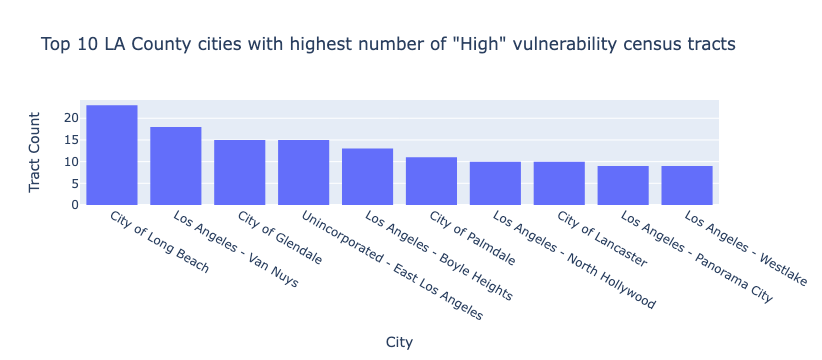

In [16]:
# a simple bar chart, putting city on the x-axis
fig = px.bar(svi_high_bycity.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='City',
       y='Tract Count',
       title='Top 10 LA County cities with highest number of "High" vulnerability census tracts'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

Now let's look at the top 10 census tracts for highest vulnerability

In [17]:
#Sort 'High' vulnerability census tracts to look at top 10
svi_high_sorted = svi_high.sort_values(by=['SoVI_Score'],ascending = [False])

In [18]:
# display the data, but just a few columns to keep it clean
svi_high_sorted.head(10)

Census_Tract                         CSA_Label  Population  \
1726  Census Tract 1279.10            Los Angeles - Van Nuys        4960   
1886  Census Tract 1278.03            Los Angeles - Van Nuys        4675   
156   Census Tract 1201.05       Los Angeles - Panorama City        2872   
1497  Census Tract 1272.10            Los Angeles - Van Nuys        5714   
1753  Census Tract 5758.03                City of Long Beach        2938   
1919     Census Tract 2219     Los Angeles - University Park        3802   
465      Census Tract 2292      Los Angeles - Vernon Central        4648   
1269     Census Tract 5521                   City of Norwalk        6527   
2314  Census Tract 1276.04         Los Angeles - Lake Balboa        3093   
530   Census Tract 2060.32  Los Angeles - Wholesale District        5185   

      Limited_English  No_High_School_Diploma  Disability  Renters  Poverty  \
1726             34.3                    34.8         7.5     86.3     20.5   
1886             28.6                    28.2        15.0     77.4     30.8   
156              25.0                    37.9        13.3     71.5     27.7   
1497             28.5                    24.5        10.0     71.3     19.7   
1753             23.8                    35.5        15.6     88.7     36.4   
1919             28.7                    23.2         5.3     95.5     69.9   
465              25.9                    50.7         5.5     73.5     23.1   
1269             28.6                    28.7        11.9     41.6     13.2   
2314             36.2                    30.4        14.7     79.8     22.5   
530              35.0                    39.3        16.5     87.0     33.6   

      Households_Without_Vehicle_Acce  Hispanic_Latinx  White  Black  \
1726                              9.8             75.2   13.7    6.7   
1886                             18.5             64.4   25.2    2.4   
156                              23.2             75.3    6.4    1.5   
1497                             12.9             63.9   19.4    6.9   
1753                             36.9             61.3   17.1   11.2   
1919                             46.1             27.0   19.5    8.7   
465                              19.6             83.2    0.3   15.3   
1269                             15.4             71.5    9.4    4.3   
2314                             18.5             55.9   26.7    3.4   
530                              36.8             70.0   11.6    2.2   

      Native_Tribal  Asian  NHOPI  SoVI_Score  \
1726            0.0    4.3    0.0        7.80   
1886            0.1    5.6    0.0        7.76   
156             0.0   16.9    0.0        7.74   
1497            0.0    8.9    0.0        7.27   
1753            0.4    8.2    0.0        7.25   
1919            0.3   38.0    0.0        7.21   
465             0.0    1.2    0.0        7.03   
1269            0.0   14.1    0.0        6.57   
2314            0.0   11.4    0.0        6.46   
530             1.0   15.0    0.0        6.34   

                                               geometry svi_tier  
1726  POLYGON ((-118.44876 34.20119, -118.43999 34.2...     High  
1886  POLYGON ((-118.45746 34.20107, -118.44876 34.2...     High  
156   POLYGON ((-118.45025 34.23313, -118.45025 34.2...     High  
1497  POLYGON ((-118.46620 34.20567, -118.46612 34.2...     High  
1753  POLYGON ((-118.19506 33.78259, -118.19372 33.7...     High  
1919  POLYGON ((-118.29590 34.02865, -118.29154 34.0...     High  
465   POLYGON ((-118.26522 34.00069, -118.26085 34.0...     High  
1269  POLYGON ((-118.09994 33.90493, -118.09952 33.9...     High  
2314  POLYGON ((-118.48584 34.20105, -118.47493 34.2...     High  
530   POLYGON ((-118.22871 34.05259, -118.22853 34.0...     High

Time to plot it! Let's look at top 10 highest vulnerability census tracts by specific indicators

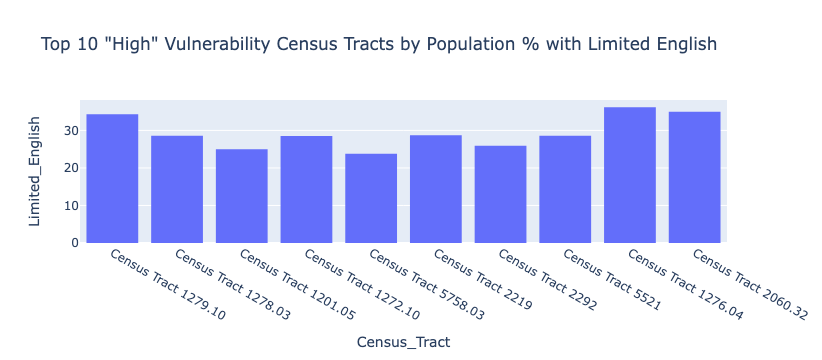

In [19]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Limited_English',
       title='Top 10 "High" Vulnerability Census Tracts by Population % with Limited English'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

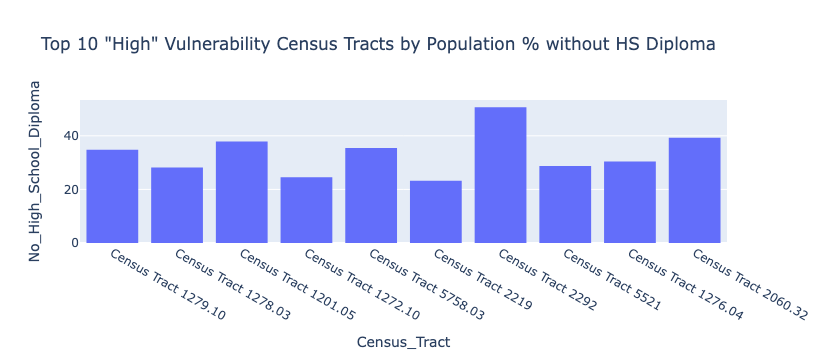

In [34]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='No_High_School_Diploma',
       title='Top 10 "High" Vulnerability Census Tracts by Population % without HS Diploma'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

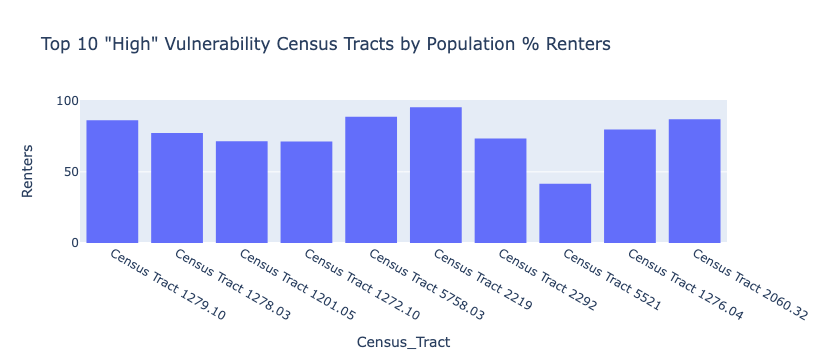

In [38]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Renters',
       title='Top 10 "High" Vulnerability Census Tracts by Population % Renters'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

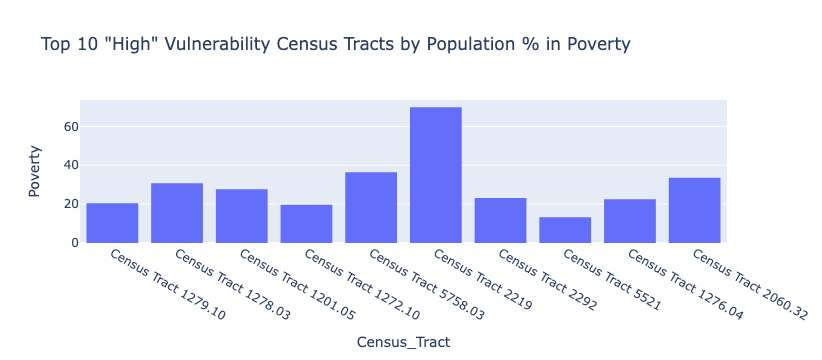

In [40]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Poverty',
       title='Top 10 "High" Vulnerability Census Tracts by Population % in Poverty'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

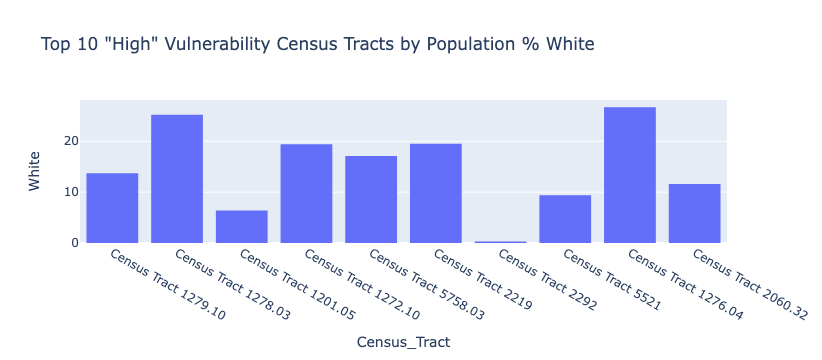

In [44]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='White',
       title='Top 10 "High" Vulnerability Census Tracts by Population % White'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

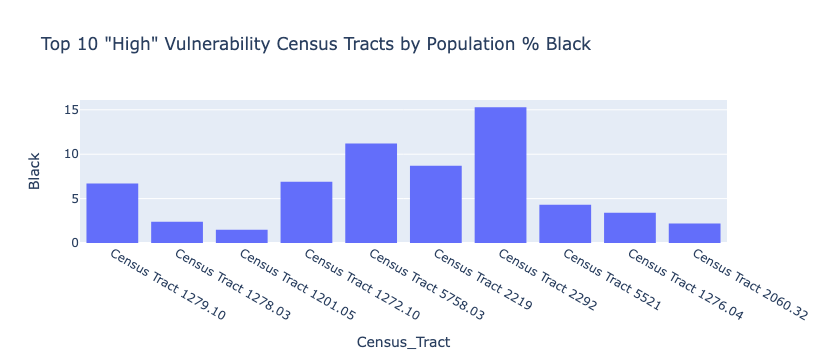

In [45]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Black',
       title='Top 10 "High" Vulnerability Census Tracts by Population % Black'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

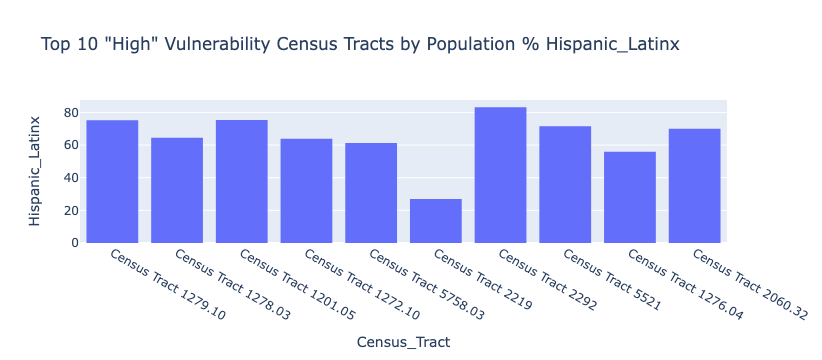

In [50]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Hispanic_Latinx',
       title='Top 10 "High" Vulnerability Census Tracts by Population % Hispanic_Latinx'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

### 'Low' Vulnerability Cities/Census Tracts ###

In [20]:
#Let's create another dataframe for 'Low' vulnerability
#creates list
svi_df[svi_df['svi_tier']=='Low']

Census_Tract                                 CSA_Label  \
24       Census Tract 1873                  Los Angeles - Silverlake   
102      Census Tract 4074                       City of West Covina   
124   Census Tract 5545.15                          City of Cerritos   
169   Census Tract 9108.11  Unincorporated - Angeles National Forest   
189   Census Tract 6201.01                        City of El Segundo   
...                    ...                                       ...   
2261  Census Tract 2653.03                    Los Angeles - Westwood   
2262  Census Tract 2766.01                 Los Angeles - Westchester   
2267     Census Tract 1942                   Los Angeles - Hollywood   
2284     Census Tract 1956                  Los Angeles - Silverlake   
2295  Census Tract 2151.01                Los Angeles - Miracle Mile   

      Population  Limited_English  No_High_School_Diploma  Disability  \
24          3479              2.8                     5.1         2.6   
102         1944             14.5                    13.2        10.5   
124         3738              6.8                     7.5         7.1   
169          173              0.0                    12.9         6.6   
189         5558              1.4                     2.7         6.8   
...          ...              ...                     ...         ...   
2261        4889              5.7                     5.5         4.3   
2262        4129              5.1                     1.2         7.0   
2267        3489              0.6                     2.8         3.4   
2284        3178             13.9                    20.8        11.2   
2295        2851              1.6                     0.5         3.0   

      Renters  Poverty  Households_Without_Vehicle_Acce  Hispanic_Latinx  \
24       55.6      7.1                              1.0             20.3   
102      19.4      2.4                              3.6             43.0   
124      18.3      6.5                              5.0             12.7   
169       0.0      0.0                              0.0             13.3   
189      40.5      8.9                              2.0              5.5   
...       ...      ...                              ...              ...   
2261     96.6     72.9                             23.1             23.4   
2262     39.3      9.2                              0.8             10.9   
2267     21.0      3.6                              2.1              6.1   
2284     68.2     22.7                             10.8             52.0   
2295     92.8     11.4                             14.6             15.9   

      White  Black  Native_Tribal  Asian  NHOPI  SoVI_Score  \
24     57.1    2.1            0.0   15.5    0.0       -4.18   
102    10.3    5.2            0.0   36.5    0.7       -6.21   
124    19.8   10.9            0.0   42.0    2.2       -4.94   
169    79.8    6.9            0.0    0.0    0.0       -9.97   
189    63.8    5.1            0.0   12.4    0.0       -4.74   
...     ...    ...            ...    ...    ...         ...   
2261   32.9    1.7            0.0   37.5    0.0       -6.30   
2262   58.1    7.3            0.2   14.9    0.0       -4.41   
2267   76.6    2.8            0.5    3.0    0.0       -4.34   
2284   33.2    0.7            0.0   10.1    0.0       -4.49   
2295   54.3   10.0            0.0   14.1    1.1       -4.64   

                                               geometry svi_tier  
24    POLYGON ((-118.26390 34.11113, -118.26170 34.1...      Low  
102   POLYGON ((-117.96379 34.05264, -117.95885 34.0...      Low  
124   POLYGON ((-118.08213 33.85926, -118.08211 33.8...      Low  
169   POLYGON ((-118.40529 34.38096, -118.39724 34.3...      Low  
189   POLYGON ((-118.42878 33.93097, -118.42618 33.9...      Low  
...                                                 ...      ...  
2261  POLYGON ((-118.45500 34.07032, -118.45323 34.0...      Low  
2262  POLYGON ((-118.44462 33.96132, -118.44501 33.9...      Low  

In [21]:
svi_low = svi_df[svi_df['svi_tier']=='Low']
svi_low.head(10)

Census_Tract                                 CSA_Label  \
24      Census Tract 1873                  Los Angeles - Silverlake   
102     Census Tract 4074                       City of West Covina   
124  Census Tract 5545.15                          City of Cerritos   
169  Census Tract 9108.11  Unincorporated - Angeles National Forest   
189  Census Tract 6201.01                        City of El Segundo   
263  Census Tract 1959.03                  Los Angeles - Silverlake   
280     Census Tract 2110                Los Angeles - Hancock Park   
284  Census Tract 4002.07                          City of La Verne   
312     Census Tract 1252              Los Angeles - Valley Village   
364  Census Tract 1919.01                     Los Angeles - Melrose   

     Population  Limited_English  No_High_School_Diploma  Disability  Renters  \
24         3479              2.8                     5.1         2.6     55.6   
102        1944             14.5                    13.2        10.5     19.4   
124        3738              6.8                     7.5         7.1     18.3   
169         173              0.0                    12.9         6.6      0.0   
189        5558              1.4                     2.7         6.8     40.5   
263        2165              9.3                    18.4         9.8     79.6   
280        5055             10.4                     2.5         6.4     33.0   
284        4509              3.5                     4.6        10.6      6.2   
312        3623              7.1                    10.9         7.5     63.6   
364        2841              4.0                     9.0         7.8     93.1   

     Poverty  Households_Without_Vehicle_Acce  Hispanic_Latinx  White  Black  \
24       7.1                              1.0             20.3   57.1    2.1   
102      2.4                              3.6             43.0   10.3    5.2   
124      6.5                              5.0             12.7   19.8   10.9   
169      0.0                              0.0             13.3   79.8    6.9   
189      8.9                              2.0              5.5   63.8    5.1   
263     11.6                              8.4             46.3   30.9    1.2   
280      6.0                              2.7              8.2   61.1    2.0   
284      1.0                              0.0             24.9   60.1    4.1   
312     16.5                              1.6             29.6   51.4    3.9   
364     14.6                              5.4             31.2   53.7    4.9   

     Native_Tribal  Asian  NHOPI  SoVI_Score  \
24             0.0   15.5    0.0       -4.18   
102            0.0   36.5    0.7       -6.21   
124            0.0   42.0    2.2       -4.94   
169            0.0    0.0    0.0       -9.97   
189            0.0   12.4    0.0       -4.74   
263            0.2   15.9    0.0       -4.05   
280            0.0   18.4    0.0       -4.65   
284            0.0    9.8    0.0       -4.38   
312            0.0    5.3    0.7       -5.01   
364            0.5    7.5    0.0       -5.09   

                                              geometry svi_tier  
24   POLYGON ((-118.26390 34.11113, -118.26170 34.1...      Low  
102  POLYGON ((-117.96379 34.05264, -117.95885 34.0...      Low  
124  POLYGON ((-118.08213 33.85926, -118.08211 33.8...      Low  
169  POLYGON ((-118.40529 34.38096, -118.39724 34.3...      Low  
189  POLYGON ((-118.42878 33.93097, -118.42618 33.9...      Low  
263  POLYGON ((-118.28447 34.08373, -118.28355 34.0...      Low  
280  POLYGON ((-118.34406 34.06217, -118.34401 34.0...      Low  
284  POLYGON ((-117.79415 34.12543, -117.79412 34.1...      Low  
312  POLYGON ((-118.38777 34.17215, -118.38446 34.1...      Low  
364  POLYGON ((-118.34406 34.08889, -118.34339 34.0...      Low

In [22]:
# count the number of 'low' vulnerability census tracts per city
svi_low_bycity = svi_low.value_counts('CSA_Label').reset_index(name='tract_count')
svi_low_bycity.head(10)

CSA_Label  tract_count
0                  Los Angeles - Silverlake            5
1                        City of Long Beach            5
2                     Los Angeles - Melrose            4
3             Los Angeles - Hollywood Hills            4
4   Unincorporated - Santa Monica Mountains            3
5                          City of Glendora            3
6                 Los Angeles - Westchester            3
7                 Unincorporated - Altadena            3
8  Unincorporated - Angeles National Forest            2
9                   Los Angeles - San Pedro            2

In [23]:
columns = list(svi_low_bycity)
columns

['CSA_Label', 'tract_count']

In [24]:
svi_low_bycity.columns = ['City', 'Tract Count']

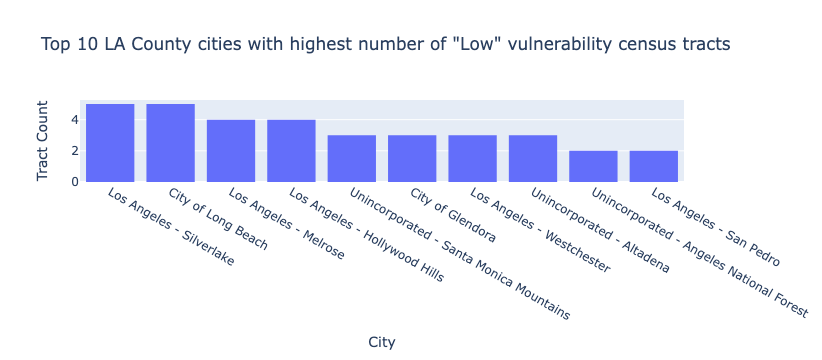

In [25]:
# a simple bar chart, putting city on the x-axis
fig = px.bar(svi_low_bycity.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='City',
       y='Tract Count',
       title='Top 10 LA County cities with highest number of "Low" vulnerability census tracts'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [26]:
svi_low_sorted = svi_low.sort_values(by=['SoVI_Score'],ascending = [True])

In [27]:
# display the data, but just a few columns to keep it clean
svi_low_sorted.head(10)

Census_Tract                                 CSA_Label  \
169   Census Tract 9108.11  Unincorporated - Angeles National Forest   
944      Census Tract 7011                  Unincorporated - West LA   
2050  Census Tract 9800.14                  Los Angeles - Wilmington   
1307  Census Tract 5041.02                  City of Santa Fe Springs   
1873  Census Tract 2060.20          Los Angeles - Wholesale District   
1201  Census Tract 9800.21            Los Angeles - Lakeview Terrace   
1512     Census Tract 1896             Los Angeles - Hollywood Hills   
1613     Census Tract 2754                     Los Angeles - Del Rey   
721   Census Tract 1344.24                  Los Angeles - West Hills   
2261  Census Tract 2653.03                    Los Angeles - Westwood   

      Population  Limited_English  No_High_School_Diploma  Disability  \
169          173              0.0                    12.9         6.6   
944         1096             17.2                    22.2        46.5   
2050          10              0.0                     0.0         0.0   
1307           9              0.0                     0.0         0.0   
1873        8666              4.2                    37.9         5.2   
1201          12              0.0                     0.0        33.3   
1512        3787              3.6                     4.5         5.1   
1613        3942              1.2                     6.1         8.8   
721         2844              1.0                     3.6         9.6   
2261        4889              5.7                     5.5         4.3   

      Renters  Poverty  Households_Without_Vehicle_Acce  Hispanic_Latinx  \
169       0.0      0.0                              0.0             13.3   
944      73.4     64.8                             48.4             24.3   
2050    100.0      0.0                              0.0             50.0   
1307    100.0      0.0                              0.0              0.0   
1873    100.0     14.6                              1.7             41.4   
1201      0.0      0.0                              0.0             66.7   
1512     67.5      9.7                              9.2             18.2   
1613     54.7      2.6                              5.9             11.6   
721       3.3      2.7                              0.6              5.8   
2261     96.6     72.9                             23.1             23.4   

      White  Black  Native_Tribal  Asian  NHOPI  SoVI_Score  \
169    79.8    6.9            0.0    0.0    0.0       -9.97   
944    37.3   24.8            0.0    9.0    0.0       -9.15   
2050   50.0    0.0            0.0    0.0    0.0       -8.15   
1307    0.0    0.0          100.0    0.0    0.0       -7.96   
1873   18.0   33.3            0.6    3.2    0.6       -7.88   
1201   33.3    0.0            0.0    0.0    0.0       -7.07   
1512   66.1    4.1            0.3    4.7    0.0       -6.93   
1613   62.1    4.3            0.0   14.8    0.0       -6.72   
721    69.3    0.6            0.0   20.5    0.0       -6.30   
2261   32.9    1.7            0.0   37.5    0.0       -6.30   

                                               geometry svi_tier  
169   POLYGON ((-118.40529 34.38096, -118.39724 34.3...      Low  
944   POLYGON ((-118.46889 34.06587, -118.46673 34.0...      Low  
2050  MULTIPOLYGON (((-118.24218 33.76637, -118.2466...      Low  
1307  POLYGON ((-118.06396 33.90227, -118.06128 33.9...      Low  
1873  POLYGON ((-118.23789 34.05411, -118.23678 34.0...      Low  
1201  POLYGON ((-118.40114 34.26659, -118.40041 34.2...      Low  
1512  POLYGON ((-118.33707 34.10823, -118.33605 34.1...      Low  
1613  POLYGON ((-118.44702 33.99052, -118.44041 33.9...      Low  
721   POLYGON ((-118.66780 34.20677, -118.66780 34.2...      Low  
2261  POLYGON ((-118.45500 34.07032, -118.45323 34.0...      Low

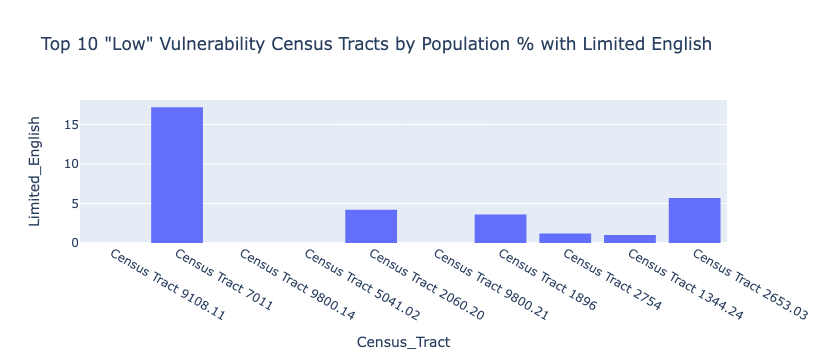

In [32]:
# a simple bar chart, putting date on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Limited_English',
       title='Top 10 "Low" Vulnerability Census Tracts by Population % with Limited English'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

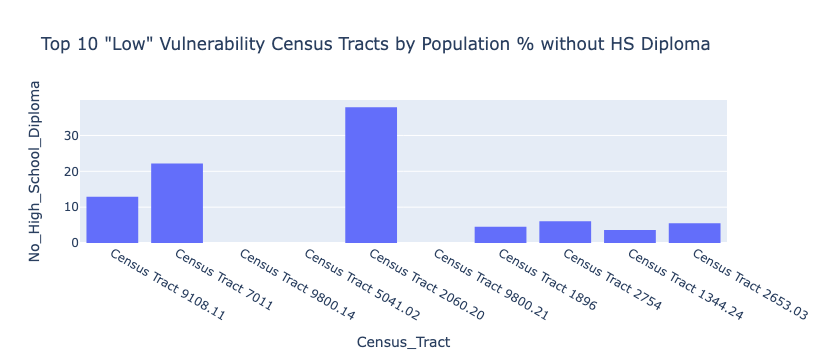

In [35]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='No_High_School_Diploma',
       title='Top 10 "Low" Vulnerability Census Tracts by Population % without HS Diploma'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

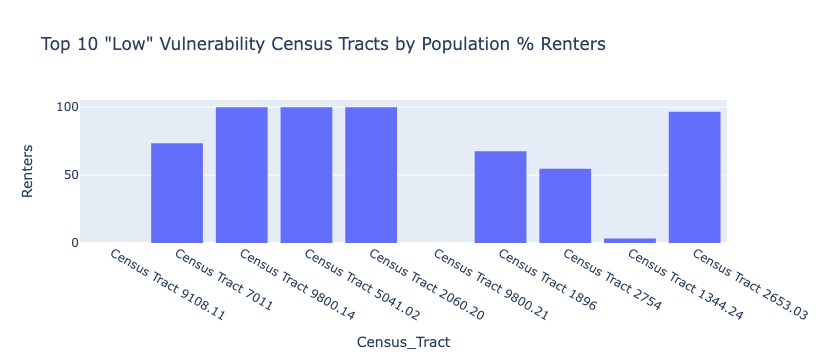

In [37]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Renters',
       title='Top 10 "Low" Vulnerability Census Tracts by Population % Renters'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

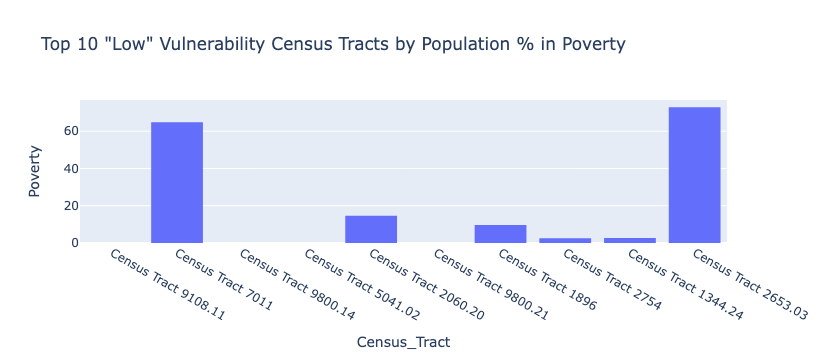

In [39]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Poverty',
       title='Top 10 "Low" Vulnerability Census Tracts by Population % in Poverty'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

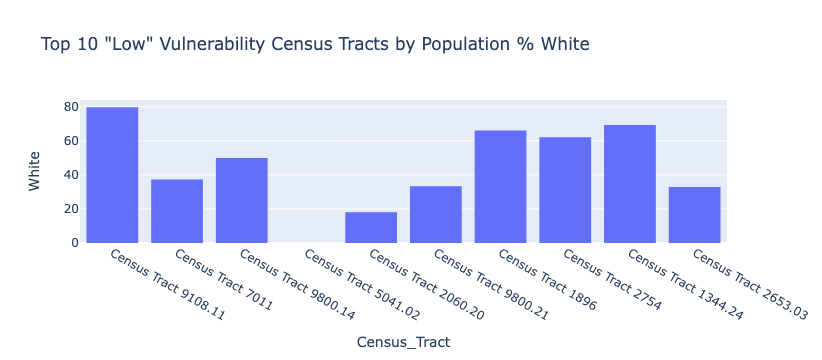

In [41]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='White',
       title='Top 10 "Low" Vulnerability Census Tracts by Population % White'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

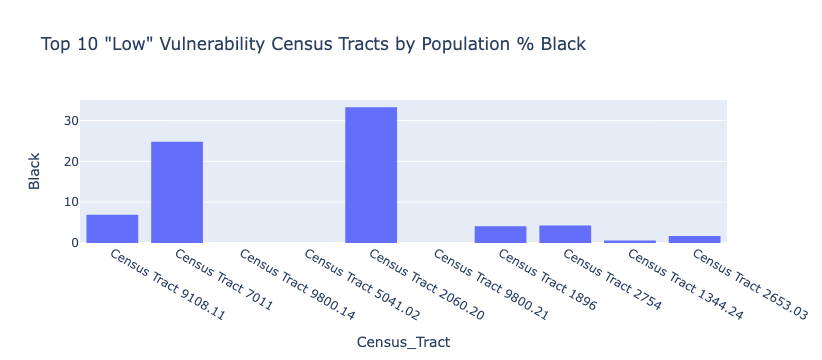

In [42]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Black',
       title='Top 10 "Low" Vulnerability Census Tracts by Population % Black'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

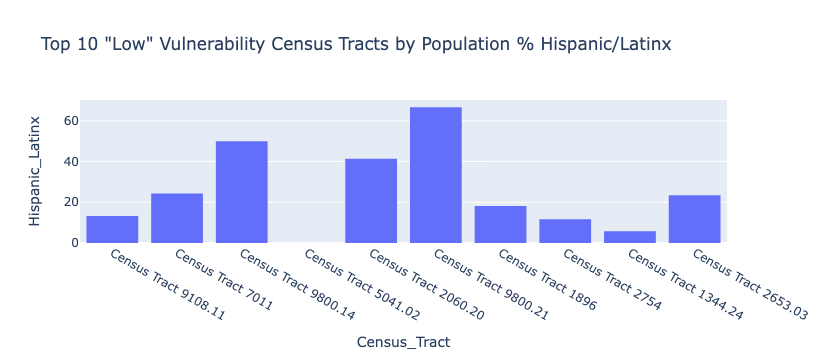

In [43]:
# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Hispanic_Latinx',
       title='Top 10 "Low" Vulnerability Census Tracts by Population % Hispanic/Latinx'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

### MAPPING ###

Okay, let's make some maps! We'll start simple and end with a nice choropleth map.

For now, I'm only interested in the overall SoVI_Score for each census tract and plan to look at the other indicators later or include them as a pop-up widget in our interactive map.

<AxesSubplot: >

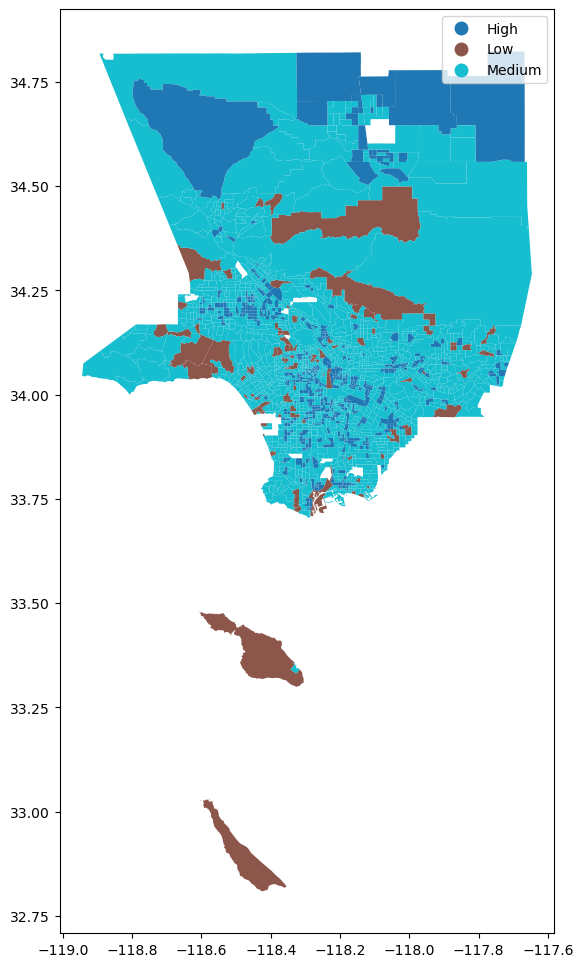

In [31]:
# simple map plotting census tract by 'svi_tier' or 'High', 'Medium', 'Low' level of vulnerability
svi_df.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'svi_tier',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

Colors are not great. But I think it will look much better as choropleth. That way I don't have to use such big vulnerability categories and it will show a gradient for the range of SVI scores

<AxesSubplot: >

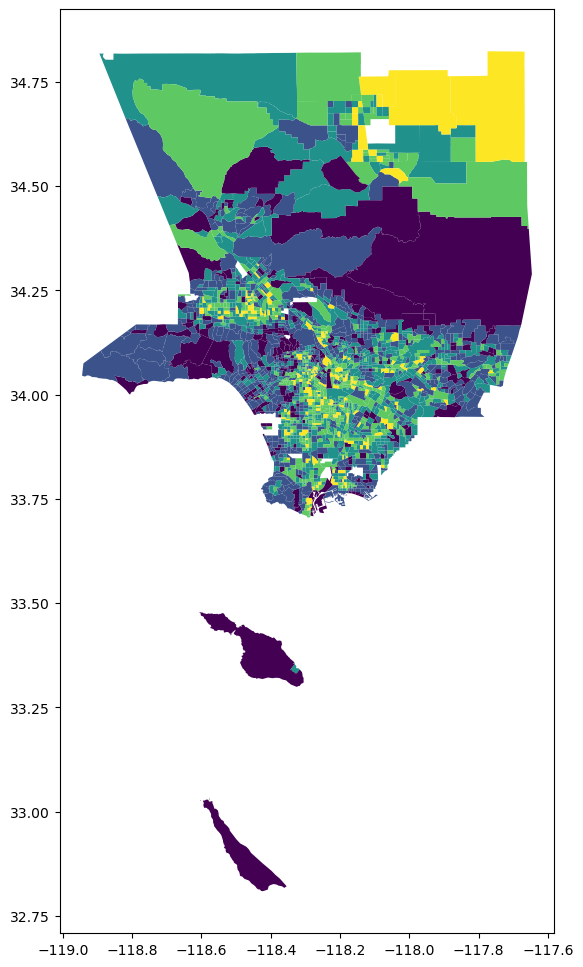

In [29]:
svi_df.plot(figsize=(14,12),
                 column='SoVI_Score',
                 legend=False, 
                 scheme='NaturalBreaks')

### Yay! The End. ###